In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

sns.set(style="whitegrid")

db_path = 'vacancies.db'
conn = sqlite3.connect(db_path)

query = "SELECT * FROM vacancies"
data = pd.read_sql_query(query, conn)
conn.close()


In [12]:
# 1. Первичный осмотр данных
print("Размер данных:", data.shape)
print("Типы данных:")
print(data.dtypes)
print("\nПример данных:")
print(data.head())

# 2. Проверка пропущенных значений
missing_values = data.isnull().sum()
print("\nПропущенные значения:")
print(missing_values)

Размер данных: (534, 15)
Типы данных:
id                         object
name                       object
area_name                  object
salary_from               float64
salary_to                 float64
salary_currency            object
published_at               object
employer_name              object
alternate_url              object
snippet_requirement        object
snippet_responsibility     object
professional_roles         object
schedule                   object
employment                 object
experience                 object
dtype: object

Пример данных:
          id                                       name    area_name  \
0  109640670                       Senior Data Engineer       Москва   
1  107866235                            Аналитик данных       Москва   
2  114911567                            Аналитик данных  Новосибирск   
3  112965264                 Аналитик данных телеметрии      Воронеж   
4  114184493  Data Engineer DWH (Офис) / Инженер данных       

In [13]:
# 3. Описательная статистика числовых столбцов
print("\nОписательная статистика числовых данных:")
print(data.describe())


Описательная статистика числовых данных:
         salary_from     salary_to
count     534.000000  5.340000e+02
mean   127186.486479  1.532148e+05
std     78011.544976  1.188806e+05
min     10000.000000  3.000000e+04
25%     70000.000000  8.000000e+04
50%    100000.000000  1.200000e+05
75%    150000.000000  1.800000e+05
max    508071.500000  1.524214e+06


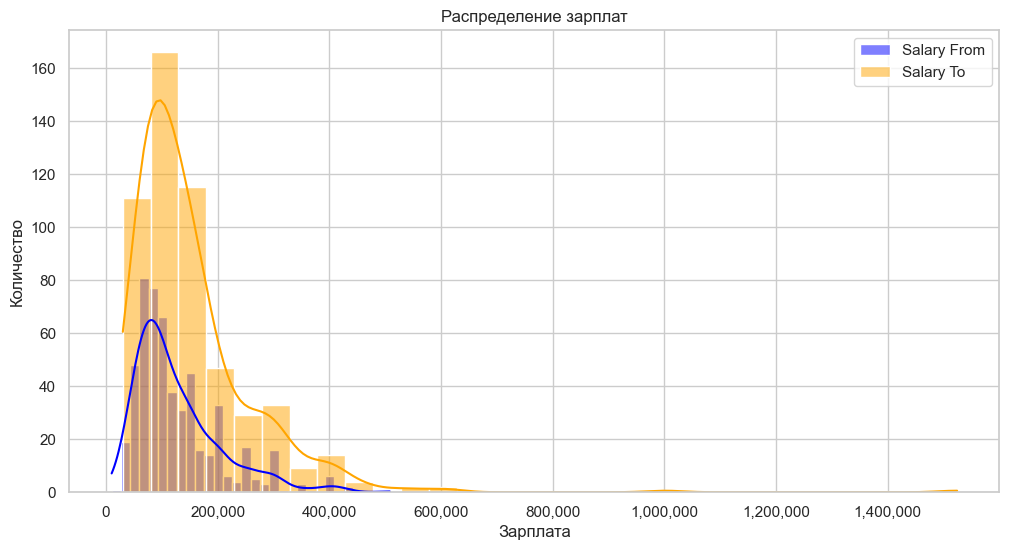

In [14]:
salary_cols = ['salary_from', 'salary_to']
if all(col in data.columns for col in salary_cols):
    plt.figure(figsize=(12, 6))
    sns.histplot(data['salary_from'], kde=True, bins=30, color='blue', label='Salary From')
    sns.histplot(data['salary_to'], kde=True, bins=30, color='orange', label='Salary To')
    
    # Настройка формата отображения чисел на оси X
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Форматируем числа с разделением на тысячи
    plt.title('Распределение зарплат')
    plt.xlabel('Зарплата')
    plt.ylabel('Количество')
    plt.legend()
    plt.show()
else:
    print("Столбцы salary_from или salary_to отсутствуют в данных.")
